# Assignment 4 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial 8 notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial 9 notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture 9 presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
#!pip install wn
#!python -m wn download omw-he:1.4

In [3]:
# word net
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
#!pip install hebrew_tokenizer

In [4]:
# tokenizer:
import hebrew_tokenizer as ht

C:\Studies\YearD\MachineLearning\HW\HW4


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape
df_test.head()

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני..."
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...


In [9]:
df_test.head(3)

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


### Your implementation:
Write your code solution in the following code-cells

In [11]:
def my_name():
    return 'Haim Adrian'


def my_id():
    return 123456789


my_name()
my_id()

'Haim Adrian'

123456789

In [12]:
# Remove duplicae rows from a dataframe
def remove_duplicates(story_df):
    # R U kidding me?! difference of whitespace
    story_df.loc[:, 'story'] = story_df.story.apply(lambda r: r.strip())
    return story_df.drop_duplicates().dropna()

In [13]:
# Decouple a dataframe to X (vector of data) and y (target value: gender)
def decouple_data(story_df):
    X = story_df['story']
    y = story_df['gender']
    return X, y

In [14]:
# Split data to train and test, with test size of 0.2
def split_data(X, y):
    return train_test_split(X, y, random_state=42, test_size=0.2, shuffle=False)

In [15]:
# Method that accepts text (single string) and tokenize it. 
# The result of this method is a python list containing all Hebrew and English words from the specified story.
def text_tokenization(story_text):
    tokens = ht.tokenize(story_text)
    words = [token for grp, token, token_num, (start_index, end_index) in tokens if grp == 'HEBREW' and len(token) > 1]
    
    # print(f'There are {len(words)} words')
    return words

In [16]:
# This method is called before TfidfVectorizer, to remove documents with Hebrew words fewer than expected.
# Assignment expectation was to have documents with 300-500 words, in Hebrew.
# Many documents do not follow this rule (less than 300), and there are many english words.
# As a result, docs with less than 100 Hebrew words will be discarded.
# This improves the f1 macro score.
# I use 50 as lower bound and not 300, to have enough space for english and date / hour tokens that filtered out by hebrew tokenizer.
def cleanup_short_docs(X_train, y_train):
    print(f'Shape before cleanup of too short docs: Train - {X_train.shape}')
    X_train_words_count = X_train.apply(lambda text: len([token for grp, token, token_num, (start_index, end_index) in ht.tokenize(text) if grp == 'HEBREW' and len(token) > 1]))
    rows_to_keep = (X_train_words_count >= 50)
    X_train = X_train.loc[rows_to_keep]
    y_train = y_train.loc[rows_to_keep]
    print(f'Shape after cleanup of too short docs: Train - {X_train.shape}')
    
    # Ignore documents with exact same words
    X_train_words_unique = X_train.apply(lambda text: set([token for grp, token, token_num, (start_index, end_index) in ht.tokenize(text) if grp == 'HEBREW' and len(token) > 1])).drop_duplicates()
    X_train = X_train.loc[X_train_words_unique.index]
    y_train = y_train.loc[X_train_words_unique.index]
    print(f'Shape after cleanup of same docs with diff order: Train - {X_train.shape}')
    
    return X_train, y_train

In [17]:
# Section for trainings
# The parameters here defined after the Grid Search from Appendix 1 (see at the end of notebook)

def fit_pipe(classifier, X_train, y_train, min_df=1, max_df=1.0, norm='l2', token_pattern=None, tokenizer=None):
    pipe = Pipeline(steps=[
        ('vectorizer', TfidfVectorizer(analyzer='word', min_df=min_df, max_df=max_df, ngram_range=(1, 2), norm=norm, token_pattern=token_pattern, tokenizer=tokenizer)),
        # TfidfVectorizer creates an sparse table, but classifiers expect dense, so transform it.
        ("dense_transformer", preprocessing.FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
        ('classifier', classifier)
        ])
    return pipe.fit(X_train, y_train)


def train_svm(X_train, y_train, n_jobs=-1):
    return fit_pipe(SGDClassifier(loss='hinge', penalty='l1', alpha=1e-4, random_state=42, max_iter=100, tol=1e-4, n_jobs=n_jobs), 
                    X_train, 
                    y_train, 
                    tokenizer=text_tokenization)


def train_lr(X_train, y_train, n_jobs=-1):
    return fit_pipe(LogisticRegression(penalty='none', solver='lbfgs', random_state=42, max_iter=100, tol=1e-2, n_jobs=n_jobs), 
                    X_train, 
                    y_train, 
                    norm='l1', 
                    min_df=0.01, 
                    max_df=0.8, 
                    tokenizer=text_tokenization)


def train_mlp(X_train, y_train):
    return fit_pipe(MLPClassifier(activation='relu', alpha=1e-4, random_state=42, max_iter=100, tol=1e-4), 
                    X_train, 
                    y_train, 
                    min_df=0.01, 
                    token_pattern='[א-ת][א-ת"\']*[א-ת]')


def train_perceptron(X_train, y_train, n_jobs=-1):
    return fit_pipe(Perceptron(penalty='l1', alpha=1e-4, random_state=42, max_iter=100, tol=1e-4, n_jobs=n_jobs), 
                    X_train, 
                    y_train, 
                    tokenizer=text_tokenization)


def train_gauss_nb(X_train, y_train): 
    return fit_pipe(GaussianNB(var_smoothing=0.0071968567300115215), 
                    X_train, 
                    y_train, 
                    norm='l1',
                    token_pattern='[א-ת][א-ת"\']*[א-ת]')


def train_knn(X_train, y_train):
    return fit_pipe(KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance'), 
                    X_train, 
                    y_train, 
                    norm='l1',
                    token_pattern='[א-ת][א-ת"\']*[א-ת]')


def train_decision_tree(X_train, y_train):
    return fit_pipe(DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3, min_samples_split=25, random_state=42), 
                    X_train, 
                    y_train, 
                    norm='l1', 
                    max_df=0.8, 
                    token_pattern='[א-ת][א-ת"\']*[א-ת]')


def train_linear_svc(X_train, y_train):
    return fit_pipe(LinearSVC(loss='squared_hinge', penalty='l2', random_state=42, max_iter=10, tol=1e-4), 
                    X_train, 
                    y_train, 
                    min_df=0.01, 
                    max_df=0.8, 
                    token_pattern='[א-ת][א-ת"\']*[א-ת]')


def train_multinomial_nb(X_train, y_train):
    return fit_pipe(MultinomialNB(nb__alpha=0.01), 
                    X_train, 
                    y_train, 
                    min_df=0.01, 
                    token_pattern='[א-ת][א-ת"\']*[א-ת]')


def train_voting_classifier(X_train, y_train):
    estimators = [
        ('svm', train_svm(X_train, y_train, n_jobs=1)), 
        ('lr', train_lr(X_train, y_train, n_jobs=1)), 
        ('knn', train_knn(X_train, y_train)), 
        ('decision_tree', train_decision_tree(X_train, y_train)), 
        ('gauss_nb', train_gauss_nb(X_train, y_train))
    ]
    
    weights = [0.37, 0.2, 0.17, 0.13, 0.11]
    return VotingClassifier(estimators=estimators, weights=weights, n_jobs=-1, verbose=True).fit(X_train, y_train)


In [18]:
def evaluate_f1(clf, X_test, y_test):
    # Predict with the test data and return f1 score
    y_pred = clf.predict(X_test)
    return f1_score(y_true=y_test, y_pred=y_pred, average='macro')

In [19]:
# Helper method to plot descriptive confusion matrix, same as we saw during lectures.
# Rows represent the true classification, and columns represent the predicted classification.
def plot_confusion_matrix(y_test, y_pred, clf_name, f1_score):
    conf_mat = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    ax.set_title(f'{clf_name} Gender Classification\nF1 Macro: {"{:.3f}".format(f1_score)}\n', y=1.1, fontsize='xx-large', fontweight='roman')
    ax.set_ylabel('True Label', fontsize='x-large')
    ax.set_xlabel('Predicted Label', fontsize='x-large')
    
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.invert_yaxis()
    ax.set_xticks(np.arange(conf_mat.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(conf_mat.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels(['f', 'm'], minor=False, fontsize='x-large', fontweight='bold')
    ax.set_yticklabels(['f', 'm'], minor=False, fontsize='x-large', fontweight='bold')
    
    mappable = ax.pcolor(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(mappable, ax=ax)
    for i in range(2):
        for j in range(2):
            color = 'tab:green' if i == j else 'tab:red'
            ax.text(i + 0.4, j + 0.5, str(conf_mat[j, i]), color=color, fontsize='xx-large', fontweight='bold')

In [20]:
# A helper method used to simulate a classifier validation.
# We use this method in next cells to validate and plot confusion matrix for various classifiers
def validate_classifier(title, train_method):
    print(f'{title}:')

    # Pre-Processing
    df_train_no_dups = df_train.copy() #remove_duplicates(df_train)
    X_train, y_train = decouple_data(df_train_no_dups)
    X_train, X_test, y_train, y_test = split_data(X_train, y_train)
    #X_train, y_train = cleanup_short_docs(X_train, y_train)

    # Train and fit
    classifier = train_method(X_train, y_train)

    # Evaluate
    f1_macro = evaluate_f1(classifier, X_test, y_test)
    print(f'f1 macro - {f1_macro}')
    
    y_pred = classifier.predict(X_test)
    print(metrics.classification_report(y_test, y_pred, target_names=['f', 'm']))

    plot_confusion_matrix(y_test, y_pred, title, f1_macro)

Shape before cleanup of too short docs: Train - (750,)
Shape after cleanup of too short docs: Train - (748,)
Shape after cleanup of same docs with diff order: Train - (747,)
f1 macro - 0.8124451406425128
              precision    recall  f1-score   support

           f       0.76      0.67      0.71        79
           m       0.90      0.93      0.91       244

    accuracy                           0.87       323
   macro avg       0.83      0.80      0.81       323
weighted avg       0.86      0.87      0.86       323



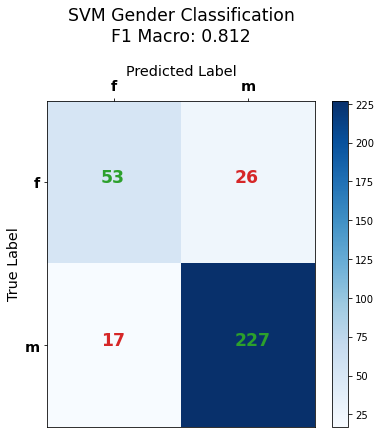

In [21]:
# Pre-Processing
df_train_no_dups = remove_duplicates(df_train)
X_train, y_train = decouple_data(df_train_no_dups)

df_test2  = pd.read_csv('GENDERS.csv', index_col=None, encoding='utf-8')
X_test2 = df_test['story']
y_test = df_test2['gender2']

X_train, y_train = cleanup_short_docs(X_train, y_train)

# Train and fit
classifier = train_svm(X_train, y_train)

# Evaluate
f1_macro = evaluate_f1(classifier, X_test2, y_test)
print(f'f1 macro - {f1_macro}')

y_pred = classifier.predict(X_test2)
print(metrics.classification_report(y_test, y_pred, target_names=['f', 'm']))

plot_confusion_matrix(y_test, y_pred, 'SVM', f1_macro)

df_predicted = df_test.drop('story', axis=1)
df_predicted['predicted_category'] = y_pred
df_predicted.to_csv('classification_results_test.csv', index=False)

In [35]:
# Test:
print('Test:')
X_train = df_train['story']
y_train = df_train['gender']

# X_train, y_train = cleanup_short_docs(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, test_size=0.2, shuffle=False)

clf = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1, 2), tokenizer=lambda x: [details[1] for details in ht.tokenize(x) if details[0] == 'HEBREW' and len(details[1]) > 1])),
    ('clf', SGDClassifier(loss='hinge', penalty='l1', alpha=1e-4, random_state=42, max_iter=50, tol=None))
])

# vec = TfidfVectorizer(ngram_range=(1, 2), tokenizer=lambda x: [details[1] for details in ht.tokenize(x) if details[0] == 'HEBREW' and len(details[1]) > 1])
# clf = SGDClassifier(loss='hinge', penalty='l1', alpha=1e-4, random_state=42, max_iter=50, tol=None)

# X_train_counts = pd.DataFrame(vec.fit_transform(X_train).toarray(), columns=vec.get_feature_names_out())
# X_test_counts = pd.DataFrame(vec.transform(X_test).toarray(), columns=vec.get_feature_names_out())

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# f1 average: 0.7427900146842878
f1_score(y_true=y_test, y_pred=y_pred, average='macro')

pd.DataFrame(metrics.confusion_matrix(y_pred=y_pred, y_true=y_test), columns=['f', 'm'], index=['f', 'm'])


Test:


0.7443503864556498

,f,m
f,16,13
m,10,112


SVM:
f1 macro - 0.7522965879265091
              precision    recall  f1-score   support

           f       0.74      0.48      0.58        29
           m       0.89      0.96      0.92       122

    accuracy                           0.87       151
   macro avg       0.81      0.72      0.75       151
weighted avg       0.86      0.87      0.86       151



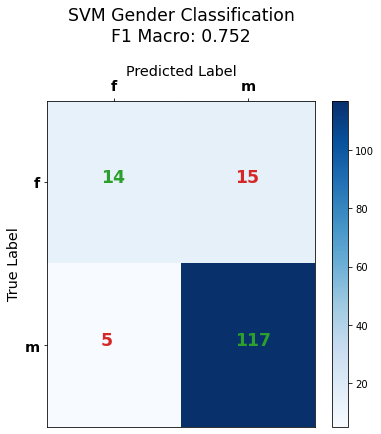

In [70]:
validate_classifier('SVM', train_svm)

Logistic Regression:
Shape before cleanup of too short docs: Train - (600,)
Shape after cleanup of too short docs: Train - (598,)
Shape after cleanup of same docs with diff order: Train - (597,)
f1 macro - 0.6810772501771793
              precision    recall  f1-score   support

           f       0.55      0.41      0.47        29
           m       0.87      0.92      0.89       121

    accuracy                           0.82       150
   macro avg       0.71      0.67      0.68       150
weighted avg       0.80      0.82      0.81       150



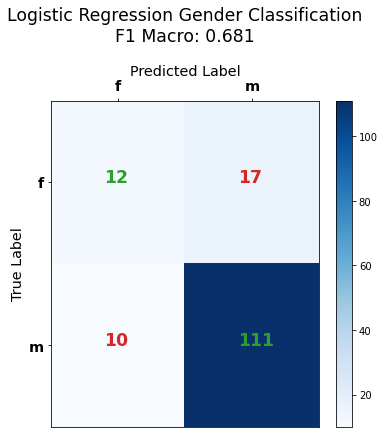

In [50]:
validate_classifier('Logistic Regression', train_lr)

KNN:
Shape before cleanup of too short docs: Train - (600,)
Shape after cleanup of too short docs: Train - (598,)
Shape after cleanup of same docs with diff order: Train - (597,)
f1 macro - 0.6549165120593692
              precision    recall  f1-score   support

           f       0.46      0.41      0.44        29
           m       0.86      0.88      0.87       121

    accuracy                           0.79       150
   macro avg       0.66      0.65      0.65       150
weighted avg       0.79      0.79      0.79       150



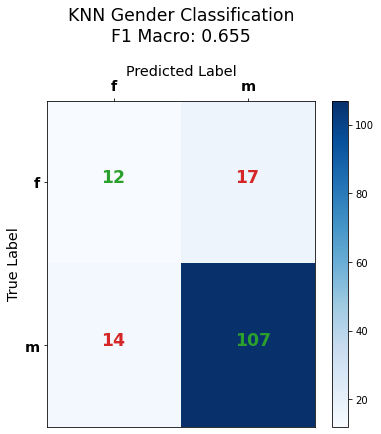

In [51]:
validate_classifier('KNN', train_knn)

Perceptron:
Shape before cleanup of too short docs: Train - (600,)
Shape after cleanup of too short docs: Train - (598,)
Shape after cleanup of same docs with diff order: Train - (597,)
f1 macro - 0.4814814814814815
              precision    recall  f1-score   support

           f       1.00      0.03      0.07        29
           m       0.81      1.00      0.90       121

    accuracy                           0.81       150
   macro avg       0.91      0.52      0.48       150
weighted avg       0.85      0.81      0.74       150



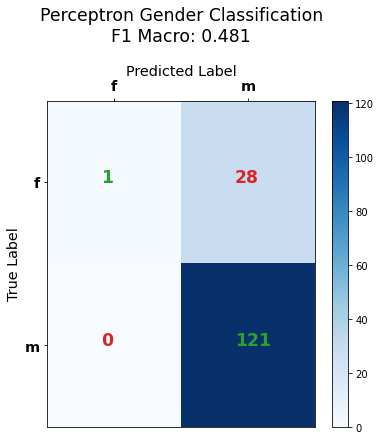

In [52]:
validate_classifier('Perceptron', train_perceptron)

Decision Tree:
Shape before cleanup of too short docs: Train - (600,)
Shape after cleanup of too short docs: Train - (598,)
Shape after cleanup of same docs with diff order: Train - (597,)
f1 macro - 0.6483825597749648
              precision    recall  f1-score   support

           f       0.41      0.48      0.44        29
           m       0.87      0.83      0.85       121

    accuracy                           0.77       150
   macro avg       0.64      0.66      0.65       150
weighted avg       0.78      0.77      0.77       150



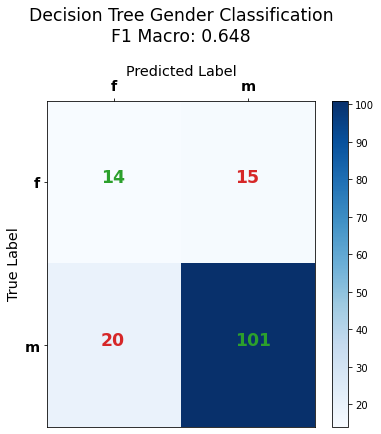

In [53]:
validate_classifier('Decision Tree', train_decision_tree)

MLP:
Shape before cleanup of too short docs: Train - (600,)
Shape after cleanup of too short docs: Train - (598,)
Shape after cleanup of same docs with diff order: Train - (597,)
f1 macro - 0.6082764162314183
              precision    recall  f1-score   support

           f       0.67      0.21      0.32        29
           m       0.84      0.98      0.90       121

    accuracy                           0.83       150
   macro avg       0.75      0.59      0.61       150
weighted avg       0.80      0.83      0.79       150



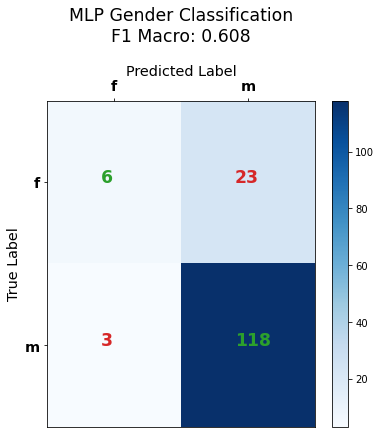

In [54]:
validate_classifier('MLP', train_mlp)

Linear SVC:
Shape before cleanup of too short docs: Train - (600,)
Shape after cleanup of too short docs: Train - (598,)
Shape after cleanup of same docs with diff order: Train - (597,)
f1 macro - 0.6146336450518961
              precision    recall  f1-score   support

           f       0.75      0.21      0.32        29
           m       0.84      0.98      0.90       121

    accuracy                           0.83       150
   macro avg       0.79      0.60      0.61       150
weighted avg       0.82      0.83      0.79       150



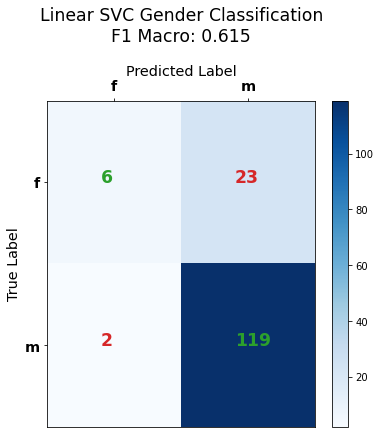

In [55]:
validate_classifier('Linear SVC', train_linear_svc)

Gaussian NB:
Shape before cleanup of too short docs: Train - (600,)
Shape after cleanup of too short docs: Train - (598,)
Shape after cleanup of same docs with diff order: Train - (597,)
f1 macro - 0.6000000000000001
              precision    recall  f1-score   support

           f       0.33      0.52      0.40        29
           m       0.87      0.74      0.80       121

    accuracy                           0.70       150
   macro avg       0.60      0.63      0.60       150
weighted avg       0.76      0.70      0.72       150



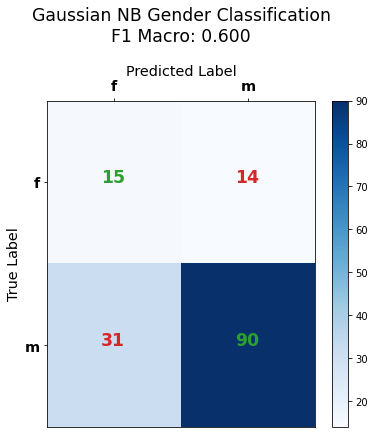

In [56]:
validate_classifier('Gaussian NB', train_gauss_nb)

Voting:
Shape before cleanup of too short docs: Train - (600,)
Shape after cleanup of too short docs: Train - (598,)
Shape after cleanup of same docs with diff order: Train - (597,)
f1 macro - 0.7603229333109074
              precision    recall  f1-score   support

           f       0.78      0.48      0.60        29
           m       0.89      0.97      0.92       121

    accuracy                           0.87       150
   macro avg       0.83      0.72      0.76       150
weighted avg       0.87      0.87      0.86       150



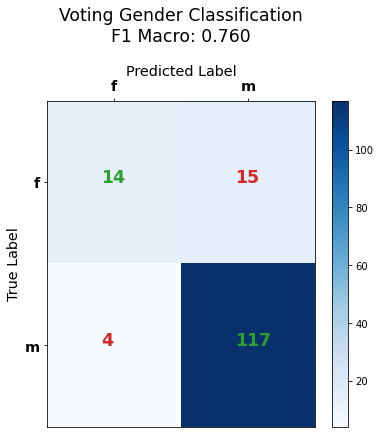

In [57]:
# Nice, but I'd prefer to go with SGDClassifier, since it succeeds better with female classification, and we use Macro average score, not Micro...
validate_classifier('Voting', train_voting_classifier)

In [75]:
# Name: Haim Adrian
# ID: 123456789
# Run the algorithm using the methods declared above.
# Note that hyperparameter tuning done outside Jupyter since I had to use a lot of resources. You can see Appendix 1 in the next cell.
# f1 macro - 0.8124451406425128
#               precision    recall  f1-score   support
#            f       0.76      0.67      0.71        79
#            m       0.90      0.93      0.91       244
#
#     accuracy                           0.87       323
#    macro avg       0.83      0.80      0.81       323
# weighted avg       0.86      0.87      0.86       323

# Remove na and duplicates from train set
df_train_no_dups = remove_duplicates(df_train)

# Decouple train and test sets such that we have vectors (X) and target (y)
X_train, y_train = decouple_data(df_train_no_dups)
X_test = df_test['story']

# Remove short documents from train set cause they reduced our score
X_train, y_train = cleanup_short_docs(X_train, y_train)

# Train SVM (SGDClassifier) - Fits using a Pipeline: TfidfVectorizer -> DenseTransformer -> SGDClassifier
classifier = train_svm(X_train, y_train)

# Predict and create a dataframe to save to file
y_predicted = classifier.predict(X_test)
df_predicted = df_test.drop('story', axis=1)
df_predicted['predicted_category'] = y_predicted
df_predicted.head()

Shape before cleanup of too short docs: Train - (750,)
Shape after cleanup of too short docs: Train - (748,)
Shape after cleanup of same docs with diff order: Train - (747,)


,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f


In [297]:
# Appendix 1: Hyperparameter tuning and classifier selection using Grid Search and Pipeline
# Section for Grid Search. Do grid search for everything in one execution.
# I have implemented another python file to execute the Grid Search on my 2 VMs with 32 cores and 128G RAM, 
# because executing this script takes a lot of time (days) and CPU. Then I used the output of VMs (log file) 
# to select the best setup (best params) for the assignment.
# Input: 
#     X_train containing stories. (story column from input dataframe)
#     y_train containing the class. (gender column from input dataframe)
# Output: Best params and best f1 score (macro)
def do_grid_search(X_train, y_train):
    best = None
    
    # Define our pipeline shared params
    param_grid = {
        'vect__analyzer': ['word'],
        'vect__tokenizer': [None, text_tokenization],
        'vect__max_df': [1.0, 0.8],
        'vect__min_df': [1, 0.01],
        'vect__ngram_range': [(1, 1), (1, 2)],
        'vect__token_pattern': ['[א-ת]+', '[א-ת][א-ת"\']*[א-ת]', '[א-תA-Za-z"\']+'],
        'vect__norm': ['l2', 'l1'],
        'norm__norm': ['l2', 'l1', 'max']
    }
    
    # Define all classifier params, and select those we need in the loop below, for each classifier
    param_grid_clf = {
        'knn__n_neighbors': [3, 5, 7, 11, 21, 35],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
        'gauss_nb__var_smoothing': np.logspace(0, -9, num=100),
        'multinomial_nb__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1],
        'decision_tree__criterion': ['gini', 'entropy'],
        'decision_tree__max_depth': list(range(1, 11)),
        'decision_tree__min_samples_split': list(range(5, 26, 5)),
        'decision_tree__min_samples_leaf': list(range(1, 11)),
        'sgd__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1],
        'sgd__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
        'sgd__penalty': ['l2', 'l1', 'elasticnet'],
        'sgd__max_iter': [10, 100, 1000],
        'sgd__tol': [None, 1e-4, 1e-3, 1e-2],
        'sgd__random_state': [42],
        'linear_svc__penalty': ['l2', 'l1'],
        'linear_svc__loss': ['hinge', 'squared_hinge'],
        'linear_svc__max_iter': [10, 100, 1000],
        'linear_svc__tol': [None, 1e-4, 1e-3, 1e-2],
        'linear_svc__random_state': [42],
        'perceptron__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1],
        'perceptron__penalty': ['l2', 'l1', 'elasticnet'],
        'perceptron__max_iter': [10, 100, 1000],
        'perceptron__tol': [None, 1e-4, 1e-3, 1e-2],
        'perceptron__random_state': [42],
        'mlp__activation': ['logistic', 'tanh', 'relu'],
        'mlp__solver': ['lbfgs', 'sgd', 'adam'],
        'mlp__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1, 1e1, 1e2],
        'mlp__max_iter': [10, 100, 200],
        'mlp__tol': [None, 1e-4, 1e-3, 1e-2],
        'mlp__random_state': [42],
        'lr__penalty': ['l2', 'l1', 'elasticnet', 'none'],
        'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'lr__max_iter': [10, 100, 200],
        'lr__tol': [None, 1e-4, 1e-3, 1e-2],
        'lr__random_state': [42]
    }
    
    # Try several classifiers
    for classifier in [
            ('knn', KNeighborsClassifier()),  # 0.6510588046664101
            ('gauss_nb', GaussianNB()),  # 0.6518249961444013
            ('multinomial_nb', MultinomialNB()),  # 0.528506243911963
            ('sgd', SGDClassifier()),  # 0.7393391828889679  BEST !!!!!!
            ('linear_svc', LinearSVC()),  # 0.6122458054727767
            ('perceptron', Perceptron()), # 0.6562832667599097
            ('lr', linear_model.LogisticRegression()),  # 0.692924017717928
            ('mlp', MLPClassifier()),  # 0.6812376337725976
            ('decision_tree', DecisionTreeClassifier())  # 0.6375187370761644
        ]:
        # Prepare a pipeline using current classifier
        text_clf = Pipeline(steps=[
            ('vect', TfidfVectorizer()),
            ('norm', preprocessing.Normalizer()),
            # TfidfVectorizer creates an sparse table, but Naive Bayes doesn't expect an sparse table,
            # hence there is this transformer which accepts an sparse table and transforms it to dense
            ("dense_transformer", preprocessing.FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
            classifier
        ])
        
        # Create a new dictionary that contains both shared params and the params relevant for current classifier
        params = param_grid | {k: v for k, v in param_grid_clf.items() if k.startswith(classifier[0])}
        
        # Do Grid Search
        print(f'Running GridSearch Cross-Validation.\nClassifier={classifier[0]}.')
        grid_search = GridSearchCV(text_clf, 
                                   param_grid=params, 
                                   scoring='f1_macro', 
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose=1)
        grid_search.fit(X_train, y_train)
        
        print(f'Best params for {classifier[0]}: {grid_search.best_params_}. \nBest score: {grid_search.best_score_}')
        if best is None or grid_search.best_score_ > best[1]:
            best = (grid_search.best_params_, grid_search.best_score_)
    
    return best

In [298]:
# Appendix 1, continue: Output of Grid Search. (Ordered, descending order)

# Best params for sgd: {'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', 'sgd__max_iter': 100.0, 'sgd__penalty': 'l1', 'sgd__random_state': 42, 'sgd__tol': 0.0001, 'vect__analyzer': 'word', 'vect__max_df': 1.0, 'vect__min_df': 1, 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': <function text_tokenization at 0x000001D8148FBA60>}. 
# Best score: 0.7393391828889679

# Best params for lr: {'lr__max_iter': 100.0, 'lr__penalty': 'none', 'lr__random_state': 42, 'lr__solver': 'lbfgs', 'lr__tol': 0.01, 'vect__analyzer': 'word', 'vect__max_df': 0.8, 'vect__min_df': 0.01, 'vect__ngram_range': (1, 2), 'vect__norm': 'l1', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': <function text_tokenization at 0x00000255517D09D0>}. 
# Best score: 0.692924017717928

# Best params for mlp: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__max_iter': 100.0, 'mlp__random_state': 42, 'mlp__solver': 'lbfgs', 'mlp__tol': 0.0001, 'vect__analyzer': 'word', 'vect__max_df': 1.0, 'vect__min_df': 0.01, 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': None}. 
# Best score: 0.6812376337725976

# Best params for perceptron: {'perceptron__alpha': 0.0001, 'perceptron__max_iter': 100.0, 'perceptron__penalty': 'l1', 'perceptron__random_state': 42, 'perceptron__tol': 0.0001, 'vect__analyzer': 'word', 'vect__max_df': 1.0, 'vect__min_df': 1, 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': <function text_tokenization at 0x00000255517D09D0>}. 
# Best score: 0.6562832667599097

# Best params for gauss_nb: {'gauss_nb__var_smoothing': 0.0071968567300115215, 'vect__analyzer': 'word', 'vect__max_df': 1.0, 'vect__min_df': 1, 'vect__ngram_range': (1, 2), 'vect__norm': 'l1', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': None}. 
# Best score: 0.6518249961444013

# Best params for knn: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance', 'vect__analyzer': 'word', 'vect__max_df': 1.0, 'vect__min_df': 1, 'vect__ngram_range': (1, 2), 'vect__norm': 'l1', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': None}. 
# Best score: 0.6510588046664101

# Best params for decision_tree: {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 9, 'decision_tree__min_samples_leaf': 3, 'decision_tree__min_samples_split': 25, 'vect__analyzer': 'word', 'vect__max_df': 0.8, 'vect__min_df': 1, 'vect__ngram_range': (1, 2), 'vect__norm': 'l1', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': None}. 
# Best score: 0.6375187370761644

# Best params for linear_svc: {'linear_svc__loss': 'squared_hinge', 'linear_svc__max_iter': 10.0, 'linear_svc__penalty': 'l2', 'linear_svc__random_state': 42, 'linear_svc__tol': 0.0001, 'vect__analyzer': 'word', 'vect__max_df': 0.8, 'vect__min_df': 0.01, 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': None}. 
# Best score: 0.6122458054727767

# Best params for multinomial_nb: {'multinomial_nb__alpha': 0.01, 'vect__analyzer': 'word', 'vect__max_df': 1.0, 'vect__min_df': 0.01, 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__token_pattern': '[א-ת][א-ת"\']*[א-ת]', 'vect__tokenizer': None}. 
# Best score: 0.528506243911963

In [53]:
# Appendix 2, see data
df_train_no_dups = remove_duplicates(df_train)
df_train_no_dups.head()
print('Before remove:', df_train.shape)
print('After remove:', df_train_no_dups.shape)

tokens = text_tokenization(df_train.iloc[0][0])
tokens[0:5]

X_train, y_train = decouple_data(df_train_no_dups)
print(f"{len(TfidfVectorizer(tokenizer=text_tokenization).fit(X_train, y_train).get_feature_names())} tokens using Hebrew tokenizer.")
pattern = r'[א-ת]+'
print(f"{len(TfidfVectorizer(token_pattern=pattern).fit(X_train, y_train).get_feature_names())} tokens using pattern: {pattern}.")
pattern = '[א-ת"\']+'
print(f'{len(TfidfVectorizer(token_pattern=pattern).fit(X_train, y_train).get_feature_names())} tokens using pattern: {pattern}.')
pattern = '[א-תA-Za-z"\']+'
print(f'{len(TfidfVectorizer(token_pattern=pattern).fit(X_train, y_train).get_feature_names())} tokens using pattern: {pattern}.')
pattern = '[א-תA-Za-z"\':\\\\]+'
print(f'{len(TfidfVectorizer(token_pattern=pattern).fit(X_train, y_train).get_feature_names())} tokens using pattern: {pattern}.')
pattern = '[א-תA-Za-z0-9"\':\\\\]+'
print(f'{len(TfidfVectorizer(token_pattern=pattern).fit(X_train, y_train).get_feature_names())} tokens using pattern: {pattern}.')
pattern = '[א-תA-Za-z0-9][א-תA-Za-z0-9"\':\\\\\.]*[א-תA-Za-z0-9]'  # Allow dots within token, and ignore words with less than 2 chars
print(f'{len(TfidfVectorizer(token_pattern=pattern).fit(X_train, y_train).get_feature_names())} tokens using pattern: {pattern}.')

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f


Before remove: (753, 2)
After remove: (750, 2)


['כשחבר', 'הזמין', 'אותי', 'לחול', 'לא']

34526 tokens using Hebrew tokenizer.
34467 tokens using pattern: [א-ת]+.
35093 tokens using pattern: [א-ת"']+.
35293 tokens using pattern: [א-תA-Za-z"']+.
35392 tokens using pattern: [א-תA-Za-z"':\\]+.
35739 tokens using pattern: [א-תA-Za-z0-9"':\\]+.
35313 tokens using pattern: [א-תA-Za-z0-9][א-תA-Za-z0-9"':\\\.]*[א-תA-Za-z0-9].


### Save output to csv
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [74]:
df_predicted.to_csv('classification_results.csv', index=False)